In [8]:
import tensorflow as tf
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt

Sima lineárils regresszió tensorflowban

In [9]:
# Train a data set

size_data = numpy.asarray([ 2104,  1600,  2400,  1416,  3000,  1985,  1534,  1427,
  1380,  1494,  1940,  2000,  1890,  4478,  1268,  2300,
  1320,  1236,  2609,  3031,  1767,  1888,  1604,  1962,
  3890,  1100,  1458,  2526,  2200,  2637,  1839,  1000,
  2040,  3137,  1811,  1437,  1239,  2132,  4215,  2162,
  1664,  2238,  2567,  1200,   852,  1852,  1203 ])
price_data = numpy.asarray([ 399900,  329900,  369000,  232000,  539900,  299900,  314900,  198999,
  212000,  242500,  239999,  347000,  329999,  699900,  259900,  449900,
  299900,  199900,  499998,  599000,  252900,  255000,  242900,  259900,
  573900,  249900,  464500,  469000,  475000,  299900,  349900,  169900,
  314900,  579900,  285900,  249900,  229900,  345000,  549000,  287000,
  368500,  329900,  314000,  299000,  179900,  299900,  239500 ])

# Test a data set

size_data_test = numpy.asarray([ 1600, 1494, 1236, 1100, 3137, 2238 ])
price_data_test = numpy.asarray([ 329900, 242500, 199900, 249900, 579900, 329900 ])

def normalize(array): 
    return (array - array.mean()) / array.std()

# Normalize a data set

size_data_n = normalize(size_data)
price_data_n = normalize(price_data)

size_data_test_n = normalize(size_data_test)
price_data_test_n = normalize(price_data_test)

# Display a plot
plt.plot(size_data, price_data, 'ro', label='Samples data')
plt.legend()
plt.draw()

samples_number = price_data_n.size


Iteration: 0001 cost= 0.287910938 W= 0.499979 b= -0.4252
Iteration: 0021 cost= 0.137542233 W= 0.803511 b= -0.0586378
Iteration: 0041 cost= 0.134602785 W= 0.843961 b= -0.00936873
Iteration: 0061 cost= 0.134517744 W= 0.849351 b= -0.00274638
Iteration: 0081 cost= 0.134511903 W= 0.850069 b= -0.00185625
Iteration: 0101 cost= 0.134511247 W= 0.850165 b= -0.0017366
Iteration: 0121 cost= 0.134511158 W= 0.850177 b= -0.00172051
Iteration: 0141 cost= 0.134511158 W= 0.850179 b= -0.00171835
Iteration: 0161 cost= 0.134511143 W= 0.850179 b= -0.00171806
Iteration: 0181 cost= 0.134511143 W= 0.850179 b= -0.00171802
Tuning completed: cost= 0.134511143 W= 0.850179 b= -0.00171801
Testing data cost: 0.00789466


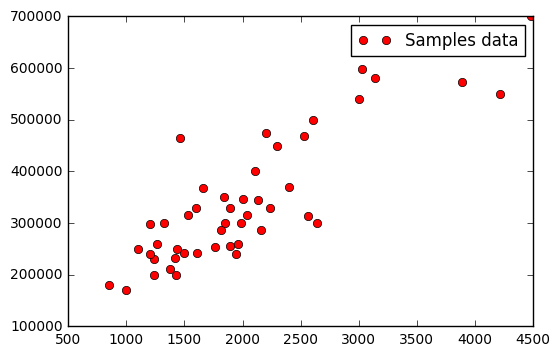

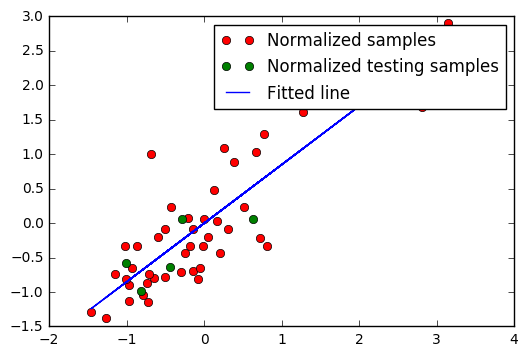

In [10]:
# TF graph input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Create a model

# Set model weights
W = tf.Variable(numpy.random.randn(), name="weight")
b = tf.Variable(numpy.random.randn(), name="bias")

# Set parameters
learning_rate = 0.1
training_iteration = 200

# Construct a linear model
model = tf.add(tf.mul(X, W), b)

# Minimize squared errors
cost_function = tf.reduce_sum(tf.pow(model - Y, 2))/(2 * samples_number) #L2 loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function) #Gradient descent

# Initialize variables
init = tf.initialize_all_variables()

# Launch a graph
with tf.Session() as sess:
    sess.run(init)

    display_step = 20
    # Fit all training data
    for iteration in range(training_iteration):
        for (x, y) in zip(size_data_n, price_data_n):
            sess.run(optimizer, 
                     feed_dict={X: x, Y: y})

        # Display logs per iteration step
        if iteration % display_step == 0:
            print("Iteration:", '%04d' % (iteration + 1), 
                  "cost=", "{:.9f}".format(sess.run(cost_function, feed_dict={X:size_data_n, Y:price_data_n})),
                  "W=", sess.run(W), "b=", sess.run(b))
            
    tuning_cost = sess.run(cost_function, 
                           feed_dict={
                                X: normalize(size_data_n), 
                                Y: normalize(price_data_n)
                          })
            
    print("Tuning completed:", "cost=", 
          "{:.9f}".format(tuning_cost), 
          "W=", sess.run(W), "b=", sess.run(b))
    
    # Validate a tuning model
    
    testing_cost = sess.run(cost_function, feed_dict={X: size_data_test_n, Y: price_data_test_n})
    
    print("Testing data cost:" , testing_cost)
    
    # Display a plot
    plt.figure()
    plt.plot(size_data_n, price_data_n, 'ro', label='Normalized samples')
    plt.plot(size_data_test_n, price_data_test_n, 'go', label='Normalized testing samples')
    plt.plot(size_data_n, sess.run(W) * size_data_n + sess.run(b), label='Fitted line')
    plt.legend()
    
    plt.show()